In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Data showcase with pandas

In [8]:
df = pd.read_csv("VideoGames_sales.csv")
df.head(10)

,Number,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06
5,5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08
6,6,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09
7,7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26
8,8,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13
9,9,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13


In [10]:
df.shape

(64016, 13)

Data analysis with MySQL

In [12]:
import mysql.connector
mydb = mysql.connector.connect(
    host="127.0.0.1",
    user = "root",
    password = "MySQL-S3rver",
    database = "videogame_sales"
)
if mydb.is_connected():
    print("Connected to database")

Connected to database


Print everything from the database

In [13]:
cursor = mydb.cursor()

sql = "select * from sales;"
cursor.execute(sql)
myresult = cursor.fetchall()

for row in myresult:
    print(row)

(0, 'Grand Theft Auto V', 'PS3', 'Action', 'Rockstar Games', 'Rockstar North', '9.4', 20.32, 6.37, 0.99, 9.85, 3.12, '2013-09-17')
(1, 'Grand Theft Auto V', 'PS4', 'Action', 'Rockstar Games', 'Rockstar North', '9.7', 19.39, 6.06, 0.6, 9.71, 3.02, '2014-11-18')
(2, 'Grand Theft Auto: Vice City', 'PS2', 'Action', 'Rockstar Games', 'Rockstar North', '9.6', 16.15, 8.41, 0.47, 5.49, 1.78, '2002-10-28')
(3, 'Grand Theft Auto V', 'X360', 'Action', 'Rockstar Games', 'Rockstar North', '', 15.86, 9.06, 0.06, 5.33, 1.42, '2013-09-17')
(4, 'Call of Duty: Black Ops 3', 'PS4', 'Shooter', 'Activision', 'Treyarch', '8.1', 15.09, 6.18, 0.41, 6.05, 2.44, '2015-11-06')
(5, 'Call of Duty: Modern Warfare 3', 'X360', 'Shooter', 'Activision', 'Infinity Ward', '8.7', 14.82, 9.07, 0.13, 4.29, 1.33, '2011-11-08')
(6, 'Call of Duty: Black Ops', 'X360', 'Shooter', 'Activision', 'Treyarch', '8.8', 14.74, 9.76, 0.11, 3.73, 1.14, '2010-11-09')
(7, 'Red Dead Redemption 2', 'PS4', 'Action-Adventure', 'Rockstar Games',

Get all games with higher critic score than 9.5

In [18]:
sql = """
select title, console, critic_score
from sales
where critic_score > 9.5
"""
cursor.execute(sql)
myresult = cursor.fetchall()
for title, console, critic_score in myresult:
    print(title, console, critic_score)

Grand Theft Auto V PS4 9.7
Grand Theft Auto: Vice City PS2 9.6
Red Dead Redemption 2 PS4 9.8
Grand Theft Auto IV X360 10.0
Grand Theft Auto IV PS3 10.0
Call of Duty 4: Modern Warfare X360 9.6
Batman: Arkham City PS3 9.6
Tony Hawk's Pro Skater PS 9.6
Tony Hawk's Pro Skater 4 PS2 9.6
BioShock X360 9.6
Portal 2 X360 9.6
The Orange Box X360 9.7
Portal 2 PS3 9.6
Red Dead Redemption: Undead Nightmare PS3 10.0
Red Dead Redemption: Undead Nightmare X360 10.0
The Walking Dead: A Telltale Games Series PS3 9.7


Show each publisher's critic_score mean and sort by that mean


In [20]:
sql = """
select publisher, AVG(critic_score)
from sales
group by publisher
order by AVG(critic_score) desc;
"""
cursor.execute(sql)
myresult = cursor.fetchall()
for publisher, critic_score in myresult:
    print(publisher, critic_score)


Valve 9.6
GT Interactive 8.5
RedOctane 8.424999999999999
Sold Out 8.4
Arc System Works 8.0
Kalypso 7.7
Rockstar Games 7.629999999999999
Take-Two Interactive 7.6
Working Designs 7.6
Microsoft Game Studios 7.594736842105264
Marvelous Interactive 7.5
Koei Tecmo 7.4
Mojang 7.35
Square EA 7.160000000000001
CDV Software Entertainment 7.05
Universal Interactive 6.9
ASCII Entertainment 6.866666666666667
Hello Games 6.8
Ocean 6.6
Warner Bros. Interactive 6.3066666666666675
JoWood Productions 6.2
Microids 6.1
SouthPeak Interactive 6.040000000000001
Maxis 6.0
Blizzard Entertainment 5.933333333333334
Acclaim Entertainment 5.85
Ignition Entertainment 5.85
Codemasters 5.8
Midway Games 5.7
Microsoft 5.54
D3 Publisher 5.358333333333333
Activision 5.3033707865168545
Nintendo 5.23284671532847
Bethesda Softworks 5.1947368421052635
Namco Bandai 4.994915254237288
Eidos Interactive 4.986363636363635
Majesco 4.92
EA Sports 4.870588235294117
Ubisoft 4.81981981981982
2K Sports 4.726923076923077
Electronic Arts

Showcase the 5 most sold games (all the sales from different consoles) from the dataset with matplotlib

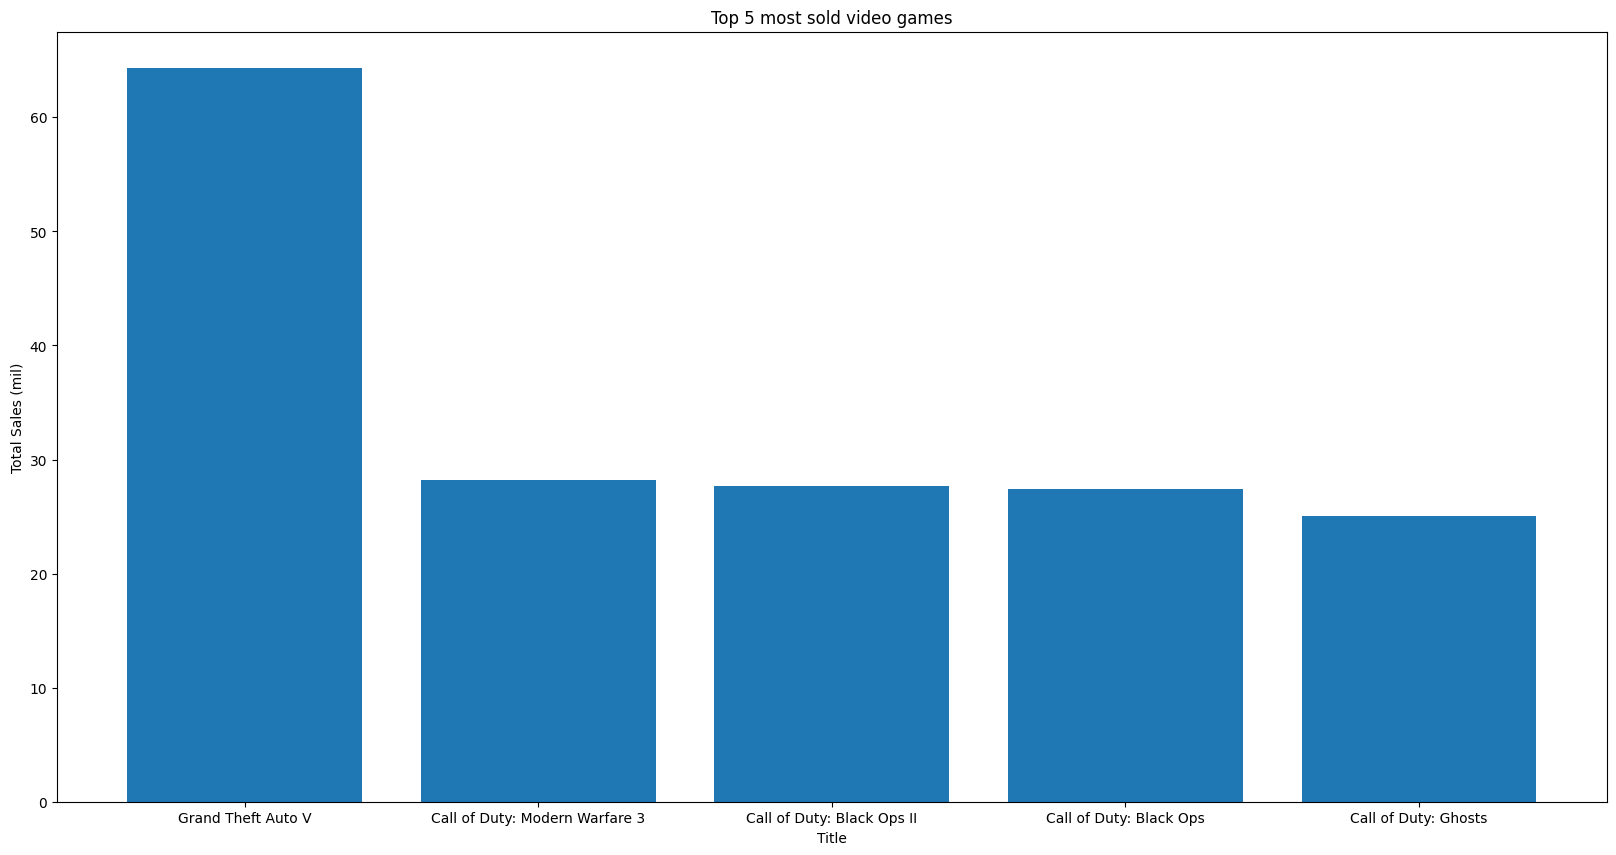

In [39]:
sql = """
select title, sum(total_sales)
from sales
group by title
order by sum(total_sales) desc
limit 5;
"""
cursor.execute(sql)
myresult = cursor.fetchall()

title = []
total_sales = []
for row in myresult:
    title.append(row[0])
    total_sales.append(row[1])

#visualize the data
plt.figure(figsize = (20,10))
plt.bar(title, total_sales)
plt.xlabel("Title")
plt.ylabel("Total Sales (mil)")
plt.title("Top 5 most sold video games")
plt.show()